In [217]:
import pandas as pd
import numpy as np
import seaborn as sns

In [218]:
df = pd.read_csv('Heart_Disease.csv')
import imblearn
imblearn.__version__

'0.7.0'

In [219]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [220]:
df.dropna(inplace=True)

In [221]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [222]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [224]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 


Before OverSampling, counts of label '1': 381
Before OverSampling, counts of label '0': 2179 

After OverSampling, the shape of train_X: (4358, 15)
After OverSampling, the shape of train_y: (4358,) 

After OverSampling, counts of label '1': 2179
After OverSampling, counts of label '0': 2179


In [225]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=42) 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 

from sklearn.metrics import classification_report
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.62      0.74       922
           1       0.24      0.62      0.34       176

    accuracy                           0.62      1098
   macro avg       0.57      0.62      0.54      1098
weighted avg       0.79      0.62      0.67      1098



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [226]:
X_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
362,0,48,4.0,0,0.0,0.0,0,0,0,200.0,118.0,78.0,24.53,63.0,98.0
1632,1,41,2.0,1,40.0,0.0,0,1,0,313.0,114.0,79.0,25.63,60.0,93.0
283,0,39,4.0,0,0.0,0.0,0,0,0,260.0,100.0,74.5,20.51,96.0,66.0
1325,0,36,3.0,0,0.0,0.0,0,0,0,230.0,112.5,73.5,22.36,63.0,65.0
2154,0,40,4.0,1,10.0,0.0,0,0,0,200.0,116.0,69.0,23.90,75.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,45,4.0,1,15.0,0.0,0,0,0,224.0,117.0,74.5,16.75,68.0,87.0
3940,0,47,1.0,1,30.0,0.0,0,0,0,260.0,126.5,81.0,26.58,90.0,82.0
1107,0,42,1.0,1,20.0,0.0,0,0,0,209.0,105.0,65.0,23.80,69.0,64.0
1087,0,40,2.0,1,10.0,0.0,0,0,0,216.0,112.5,76.5,27.22,75.0,77.0


In [231]:
df.loc[df['TenYearCHD']==1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
15,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
17,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
25,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1,50,1.0,0,0.0,0.0,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0,1
4223,1,56,4.0,0,0.0,1.0,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0,1
4226,1,58,1.0,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0,1
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1


In [234]:
new_predictions = lr1.predict([[1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0]])
new_predictions

array([0], dtype=int64)

In [235]:
new_pred2 = lr1.predict([[1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0]])
new_pred2

array([1], dtype=int64)

In [229]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6229508196721312

In [230]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions)

0.3449367088607595

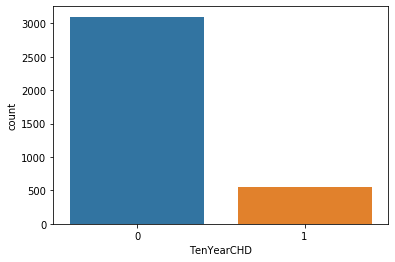

In [215]:
sns.countplot(df['TenYearCHD'])